In [4]:
# basics
import numpy as np
import pandas as pd
from scipy import ndimage

# plotting libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn as sns
from gtda.plotting import plot_heatmap, plot_point_cloud, plot_diagram


from pathlib import Path
import pickle
from typing import List
from PIL import Image

# sample data
from sample_data import *
from hepml.core import download_dataset
from hepml.core import make_point_clouds, load_shapes


# tda magic
from gtda.homology import VietorisRipsPersistence, CubicalPersistence
from gtda.diagrams import PersistenceEntropy
from gtda.pipeline import Pipeline

# ml tools
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder


# import ipympl

point_clouds_basic, labels_basic = make_point_clouds(n_samples_per_shape=10, n_points=20, noise=0.5)
point_clouds_basic.shape, labels_basic.shape
import open3d as o3d
from sample_data import sample_torus


torus = [sample_torus(20, 18, 0, 0.0) for _ in range(100)]
xs, ys = zip(*torus)
xs = np.array(xs)
ys = np.array(ys)
zs = np.random.normal(0, scale =1,size=100)

/Users/franciscocancedda/PycharmProjects/flockr/venv2/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



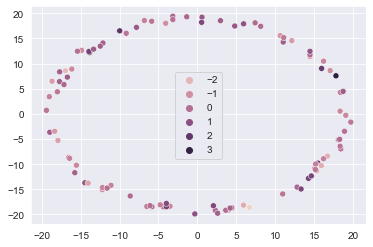

array([[[ 0.        ,  0.23044014,  0.        ],
        [ 0.        ,  0.2793248 ,  0.        ],
        [ 0.        ,  0.33173144,  0.        ],
        [ 0.        ,  0.36787394,  0.        ],
        [ 0.        ,  0.47651589,  0.        ],
        [ 0.        ,  0.56972104,  0.        ],
        [ 0.        ,  0.59763491,  0.        ],
        [ 0.        ,  0.60816997,  0.        ],
        [ 0.        ,  0.60946453,  0.        ],
        [ 0.        ,  0.6524725 ,  0.        ],
        [ 0.        ,  0.65632784,  0.        ],
        [ 0.        ,  0.71122438,  0.        ],
        [ 0.        ,  0.73178822,  0.        ],
        [ 0.        ,  0.74464452,  0.        ],
        [ 0.        ,  0.7810511 ,  0.        ],
        [ 0.        ,  0.81082338,  0.        ],
        [ 0.        ,  0.85126126,  0.        ],
        [ 0.        ,  0.88630885,  0.        ],
        [ 0.        ,  0.89578879,  0.        ],
        [ 0.        ,  0.90837586,  0.        ],
        [ 0.        

In [8]:
X = np.array([xs, ys, zs]).T
# X = np.vstack([gp.lat.values, gp.lon.values, gp.t.values])
X = np.expand_dims(X, axis=0)
homology_dimensions = [0, 1, 2]

persistence = VietorisRipsPersistence(
    metric="euclidean", homology_dimensions=homology_dimensions, n_jobs=1
)

sns.scatterplot(xs, ys, zs)
plt.show()
display(persistence.fit_transform_plot(X))

In [9]:
diagrams_basic = persistence.fit_transform(point_clouds_basic)

plot_diagram(diagrams_basic[-1])

In [11]:
plot_diagram(diagrams_basic[-1])

In [12]:
diagrams_basic[-1]

array([[0.        , 0.03141455, 0.        ],
       [0.        , 0.05311215, 0.        ],
       [0.        , 0.05751273, 0.        ],
       ...,
       [0.14520749, 0.14520749, 2.        ],
       [0.14520749, 0.14520749, 2.        ],
       [0.14520749, 0.14520749, 2.        ]])

In [16]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(diagrams_basic[-1])
o3d.io.write_point_cloud("../../TestData/sync.ply", pcd)



array([[[0.        , 0.00538615, 0.        ],
        [0.        , 0.00692672, 0.        ],
        [0.        , 0.00720771, 0.        ],
        ...,
        [0.14520749, 0.14520749, 2.        ],
        [0.14520749, 0.14520749, 2.        ],
        [0.14520749, 0.14520749, 2.        ]],

       [[0.        , 0.00829562, 0.        ],
        [0.        , 0.01034641, 0.        ],
        [0.        , 0.01088591, 0.        ],
        ...,
        [0.14520749, 0.14520749, 2.        ],
        [0.14520749, 0.14520749, 2.        ],
        [0.14520749, 0.14520749, 2.        ]],

       [[0.        , 0.00281441, 0.        ],
        [0.        , 0.00284482, 0.        ],
        [0.        , 0.00524571, 0.        ],
        ...,
        [0.14520749, 0.14520749, 2.        ],
        [0.14520749, 0.14520749, 2.        ],
        [0.14520749, 0.14520749, 2.        ]],

       ...,

       [[0.        , 0.05600753, 0.        ],
        [0.        , 0.05908919, 0.        ],
        [0.        , 0